In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
data.shape

(397, 6)

In [4]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [5]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


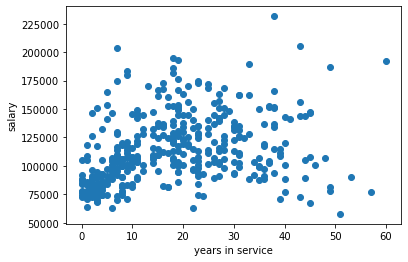

In [7]:
plt.scatter(data['yrs.service'],data['salary'])
plt.xlabel('years in service')
plt.ylabel('salary')
plt.show()

In [8]:

data.drop('discipline',axis=1,inplace=True)


In [9]:
data

,rank,yrs.since.phd,yrs.service,sex,salary
0,Prof,19,18,Male,139750
1,Prof,20,16,Male,173200
2,AsstProf,4,3,Male,79750
3,Prof,45,39,Male,115000
4,Prof,40,41,Male,141500
...,...,...,...,...,...
392,Prof,33,30,Male,103106
393,Prof,31,19,Male,150564
394,Prof,42,25,Male,101738
395,Prof,25,15,Male,95329


In [10]:
data.drop('rank',axis=1,inplace=True)
data.drop('sex',axis=1,inplace=True)
data

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [11]:
x=data.drop('salary',axis=1)
y=data['salary']

In [12]:
x

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


In [13]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=205,test_size=0.2)


In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((317, 2), (80, 2), (317,), (80,))

In [16]:
lr=LinearRegression()
lr.fit(x_train,  y_train)

LinearRegression()

In [17]:
pred=lr.predict(x_test)
pred

array([ 92436.27689943, 105427.63621296, 128341.94737748, 121414.43240656,
       128366.27090498, 138276.03206171, 115991.2312228 , 116841.71115686,
        99856.43600324,  94137.23676754, 121266.4333806 , 123053.55452544,
       117100.19498705, 115078.91353951, 122412.91136659, 123115.39227467,
        94519.39609621, 126603.47328763, 104256.83469948, 118480.83327573,
        94519.39609621, 142097.62534834, 136957.23152226,  97452.99522704,
       116545.71310493, 101471.23459462, 114610.59293412, 129006.91406383,
        99622.27570054, 128156.43412977, 100854.91496326, 115695.23317087,
        93286.75683349, 117950.6749211 , 133555.31178604,  99153.95509515,
       129857.39399789, 101471.23459462, 101471.23459462,  99240.11637188,
       115399.23511894, 131940.51319466, 100090.59630593, 113932.43555352,
       129130.5895623 , 131090.0332606 , 107104.27255358, 121328.27112983,
       120157.46961635, 137401.22860016,  99856.43600324, 109507.71332978,
       118456.50974824, 1

In [18]:
lr.score(x_test,y_test)

0.3013391677588707

In [19]:
diff=y_test- pred

In [20]:
pd.DataFrame(np.c_[y_test,pred,diff],columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,70768.0,92436.276899,-21668.276899
1,122960.0,105427.636213,17532.363787
2,116450.0,128341.947377,-11891.947377
3,91100.0,121414.432407,-30314.432407
4,144651.0,128366.270905,16284.729095
...,...,...,...
75,117256.0,105107.314634,12148.685366
76,83850.0,111824.992829,-27974.992829
77,150480.0,114672.430683,35807.569317
78,101100.0,111294.834475,-10194.834475


In [23]:
lr.score(x_test,y_test)

0.3013391677588707

In [29]:
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)

In [33]:
rmse,r2


(25970.224242206667, 0.3013391677588707)